# Face Analysis with Azure Computer Vision 4

https://learn.microsoft.com/en-us/azure/cognitive-services/computer-vision/

In [1]:
import math
import json
import matplotlib.pyplot as plt
import pandas as pd
import requests

from dotenv import load_dotenv
from IPython.display import Image
from IPython.display import display

## Azure Computer Vision 4

In [2]:
# Getting key and endpoint from the azure.env file
load_dotenv("azure.env")

key = os.getenv('key')
endpoint = os.getenv('endpoint')

## Vectors embedding functions

In [3]:
def image_embedding(image_file):
    """
    Image embedding using Azure Computer Vision 4 Florence VectorizeImage
    """
    version = "?api-version=2023-02-01-preview&modelVersion=latest"
    vec_img_url = endpoint + "/computervision/retrieval:vectorizeImage" + version

    headers_image = {
        'Content-type': 'application/octet-stream',
        'Ocp-Apim-Subscription-Key': key
    }

    with open(image_file, 'rb') as f:
        data = f.read()
    r = requests.post(vec_img_url, data=data, headers=headers_image)
    image_emb = r.json()['vector']

    return image_emb

In [4]:
def text_embedding(promptxt):
    """
    Text embedding using Azure Computer Vision 4 Florence VectorizeText
    """
    version = "?api-version=2023-02-01-preview&modelVersion=latest"
    vec_txt_url = endpoint + "/computervision/retrieval:vectorizeText" + version

    headers_prompt = {
        'Content-type': 'application/json',
        'Ocp-Apim-Subscription-Key': key
    }

    prompt = {'text': promptxt}
    r = requests.post(vec_txt_url,
                      data=json.dumps(prompt),
                      headers=headers_prompt)
    text_emb = r.json()['vector']

    return text_emb

In [5]:
def get_cosine_similarity(vector1, vector2):
    """
    Get cosine similarity value between two embedded vectors
    """
    dot_product = 0
    length = min(len(vector1), len(vector2))

    for i in range(length):
        dot_product += vector1[i] * vector2[i]

    cosine_similarity = dot_product / (math.sqrt(sum(x * x for x in vector1))\
                                       * math.sqrt(sum(x * x for x in vector2)))

    return cosine_similarity

## Attributes functions

In [6]:
def get_sentiment(image_file):
    """
    Get sentiment from an image using Azure Computer Vision 4 (Florence)
    similarity vectors embeddings
    """
    sentiment_list = [
        'anger',
        'contempt',
        'disgust',
        'fear',
        'happiness',
        'neutral',
        'sadness',
        'surprise',
    ]

    # Embedding the image file
    image_emb = image_embedding(image_file)

    simil_list = []
    for sentiment in sentiment_list:
        # Embedding the sentiment
        text_emb = text_embedding(sentiment)
        # Compute the cosine similarity
        simil = get_cosine_similarity(text_emb,
                                      image_emb)
        simil_list.append(simil)

    # Results df
    df = pd.DataFrame({
        'sentiment': sentiment_list,
        'cosine_similarity': simil_list
    }).sort_values(by='cosine_similarity', ascending=False)

    # Dict results
    preds = dict(zip(df['sentiment'], df['cosine_similarity']))
    print("\033[1;31;34mSentiment =", df.iloc[0]['sentiment'], "for",
          image_file)

    return df, preds

In [7]:
def get_gender(image_file):
    """
    Get gender from an image using Azure Computer Vision 4 (Florence)
    """
    attributes_list = [
        'male',
        'female',
    ]

    # Embedding the image file
    image_emb = image_embedding(image_file)

    simil_list = []
    for attribute in attributes_list:
        # Embedding the sentiments
        gender_emb = text_embedding(attribute)
        # Compute the cosinemilarity
        simil = get_cosine_similarity(gender_emb,
                                      image_emb)
        simil_list.append(simil)

    # Results df
    df = pd.DataFrame({
        'gender': attributes_list,
        'cosine_similarity': simil_list
    }).sort_values(by='cosine_similarity', ascending=False)

    # Dict results
    preds = dict(zip(df['gender'], df['cosine_similarity']))
    print("\033[1;31;34mGender =", df.iloc[0]['gender'], "for", image_file)

    return df, preds

In [8]:
def get_age(image_file):
    """
    Get age from an image using Azure Computer Vision 4 (Florence)
    """
    attributes_list = [
        'Less than 10 years old',
        'Between 10 years and 15 years old',
        'Between 15 years and 20 years old',
        'Between 20 years and 40 years old',
        'Between 40 years and 60 years old',
        'Between 60 years and 80 years old',
        'More than 80 years old',
    ]

    # Embedding the image file
    image_emb = image_embedding(image_file)

    simil_list = []
    for attribute in attributes_list:
        # Embedding the age
        age_emb = text_embedding(attribute)
        # Compute the cos similarity
        simil = get_cosine_similarity(age_emb,
                                      image_emb)
        simil_list.append(simil)

    # Results df
    df = pd.DataFrame({
        'age': attributes_list,
        'cosine_similarity': simil_list
    }).sort_values(by='cosine_similarity', ascending=False)

    # Dict results
    preds = dict(zip(df['age'], df['cosine_similarity']))
    print("\033[1;31;34mAge =", df.iloc[0]['age'], "for", image_file)

    return df, preds

In [9]:
def get_smile(image_file):
    """
    Get smile from an image using Azure Computer Vision 4 (Florence)
    """
    attributes_list = [
        'smiling',
        'No smiling',
    ]

    # Embedding the image file
    image_emb = image_embedding(image_file)

    simil_list = []
    for attribute in attributes_list:
        # Embedding the smile
        smile_emb = text_embedding(attribute)
        # Compute the cos similarity
        simil = get_cosine_similarity(smile_emb,
                                      image_emb)
        simil_list.append(simil)

    # Results df
    df = pd.DataFrame({
        'smile': attributes_list,
        'cosine_similarity': simil_list
    }).sort_values(by='cosine_similarity', ascending=False)

    # Dict results
    preds = dict(zip(df['smile'], df['cosine_similarity']))
    print("\033[1;31;34mSmiling =", df.iloc[0]['smile'], "for", image_file)

    return df, preds

## Testing

### Test 1

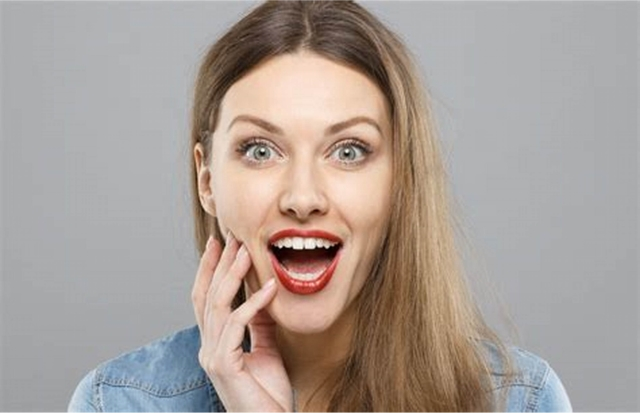

In [10]:
image_file = "image1.jpg"

Image(filename=image_file, width=360)

Sentiment = happiness for image1.jpg


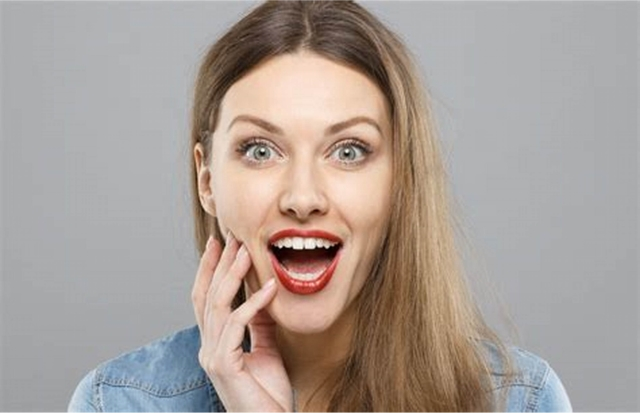

sentiment  cosine_similarity
4  happiness           0.248138
7   surprise           0.247235
3       fear           0.240667
0      anger           0.240024
1   contempt           0.225940
5    neutral           0.221208
2    disgust           0.167617
6    sadness           0.159721

In [11]:
df, preds = get_sentiment(image_file)
display(Image(filename=image_file, width=360), df)

Gender = female for image1.jpg


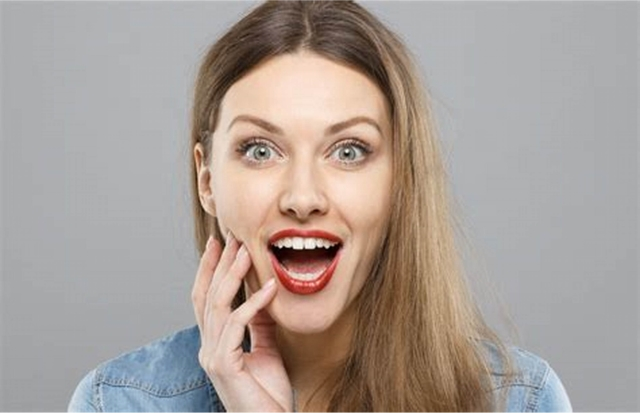

gender  cosine_similarity
1  female           0.252928
0    male           0.186099

In [12]:
df, preds = get_gender(image_file)
display(Image(filename=image_file, width=360), df)

Age = Between 20 years and 40 years old for image1.jpg


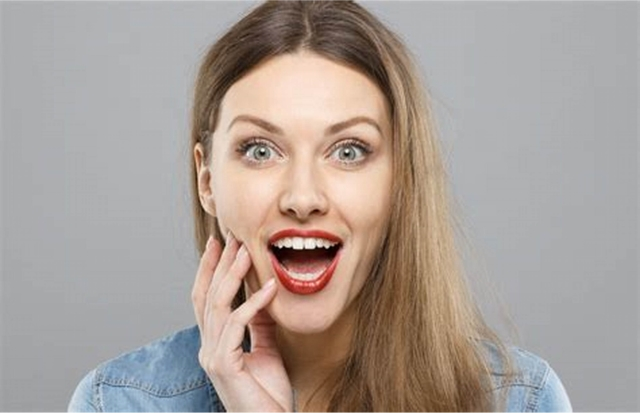

age  cosine_similarity
3  Between 20 years and 40 years old           0.224483
2  Between 15 years and 20 years old           0.220316
1  Between 10 years and 15 years old           0.217664
0             Less than 10 years old           0.211111
4  Between 40 years and 60 years old           0.209761
5  Between 60 years and 80 years old           0.186398
6             More than 80 years old           0.182124

In [13]:
df, preds = get_age(image_file)
display(Image(filename=image_file, width=360), df)

Smiling = smiling for image1.jpg


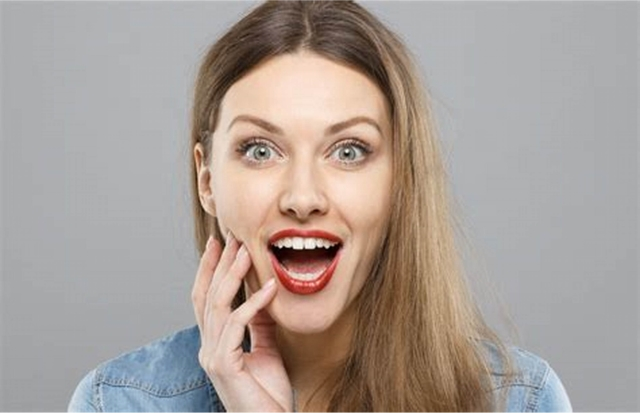

smile  cosine_similarity
0     smiling           0.284789
1  No smiling           0.257946

In [14]:
df, preds = get_smile(image_file)
display(Image(filename=image_file, width=360), df)

### Test 2

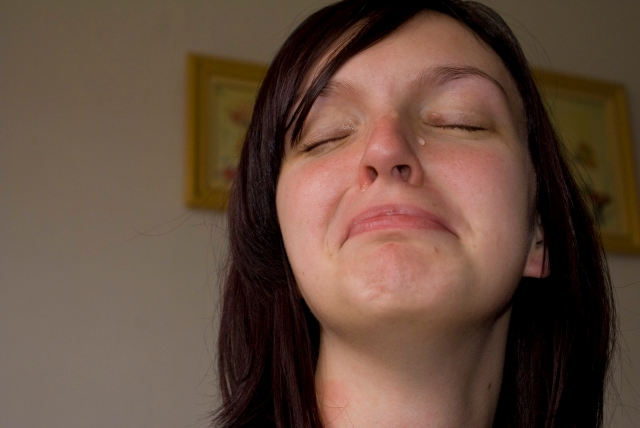

In [15]:
image_file = "image2.jpg"

Image(filename=image_file, width=360)

Sentiment = sadness for image2.jpg


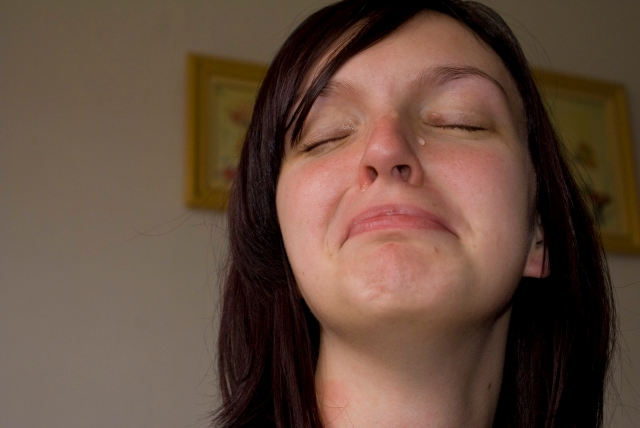

sentiment  cosine_similarity
6    sadness           0.291625
0      anger           0.288160
1   contempt           0.261938
2    disgust           0.255942
3       fear           0.254116
4  happiness           0.243189
7   surprise           0.222911
5    neutral           0.198081

In [16]:
df, preds = get_sentiment(image_file)
display(Image(filename=image_file, width=360), df)

Gender = female for image2.jpg


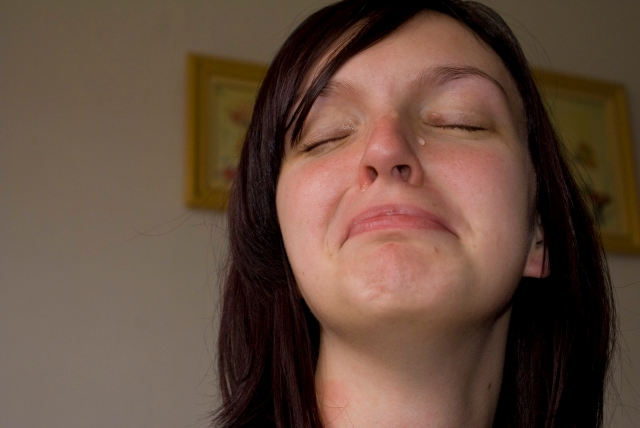

gender  cosine_similarity
1  female           0.257518
0    male           0.181701

In [17]:
df, preds = get_gender(image_file)
display(Image(filename=image_file, width=360), df)

Age = Between 10 years and 15 years old for image2.jpg


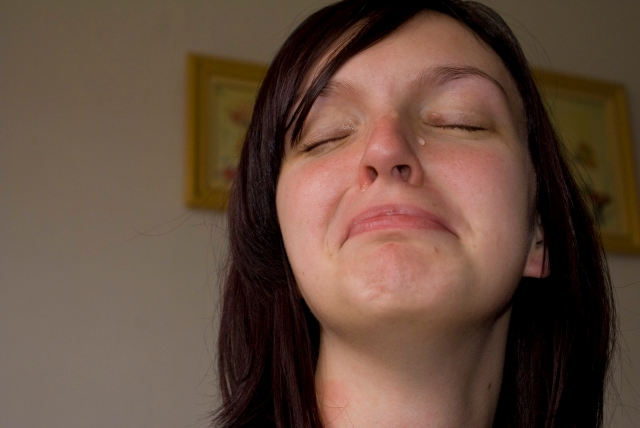

age  cosine_similarity
1  Between 10 years and 15 years old           0.254375
2  Between 15 years and 20 years old           0.253779
3  Between 20 years and 40 years old           0.240943
0             Less than 10 years old           0.233740
4  Between 40 years and 60 years old           0.201993
5  Between 60 years and 80 years old           0.176760
6             More than 80 years old           0.172049

In [18]:
df, preds = get_age(image_file)
display(Image(filename=image_file, width=360), df)

Smiling = No smiling for image2.jpg


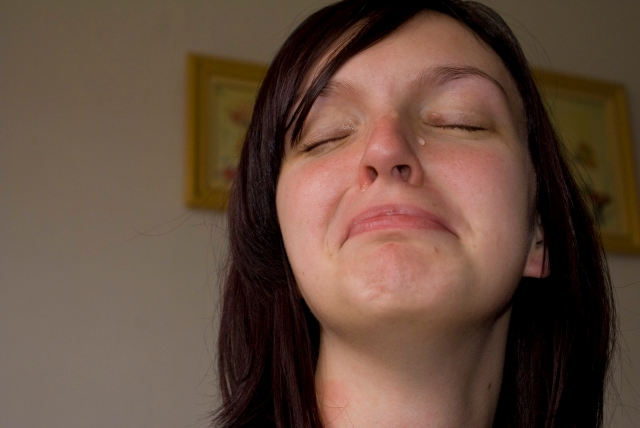

smile  cosine_similarity
1  No smiling           0.347603
0     smiling           0.267598

In [19]:
df, preds = get_smile(image_file)
display(Image(filename=image_file, width=360), df)

### Test 3

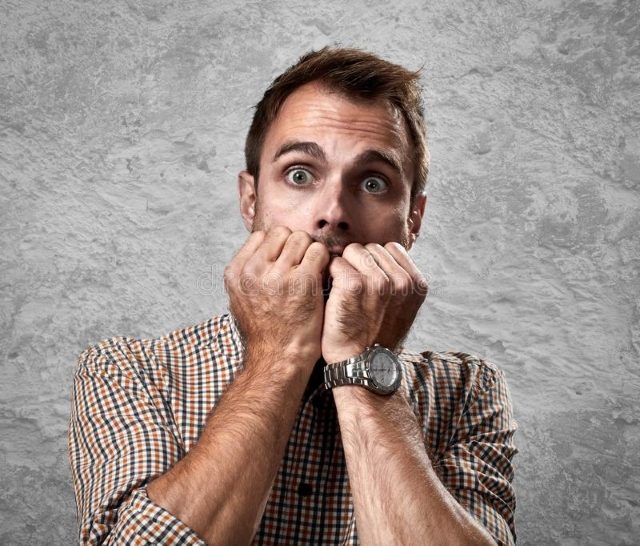

In [20]:
image_file = "image3.jpg"

Image(filename=image_file, width=360)

Sentiment = fear for image3.jpg


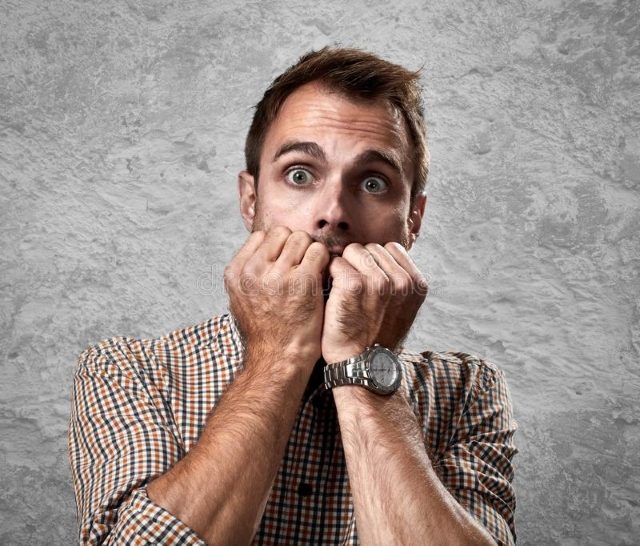

sentiment  cosine_similarity
3       fear           0.343451
7   surprise           0.304462
0      anger           0.301089
1   contempt           0.274991
6    sadness           0.248040
2    disgust           0.232217
4  happiness           0.230420
5    neutral           0.215024

In [21]:
df, preds = get_sentiment(image_file)
display(Image(filename=image_file, width=360), df)

Gender = male for image3.jpg


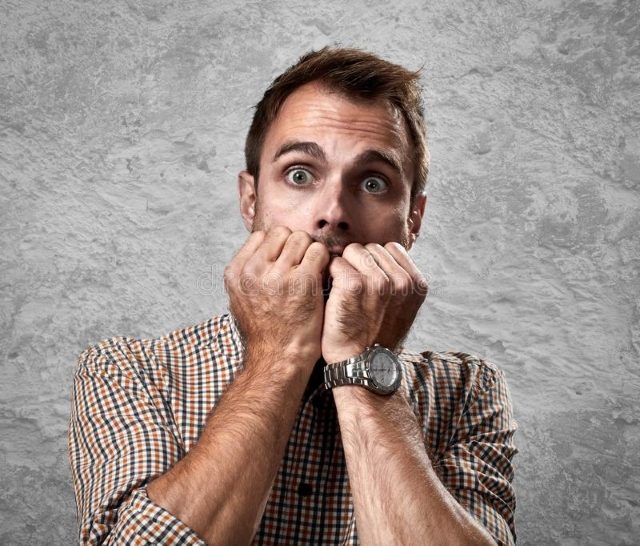

gender  cosine_similarity
0    male           0.276983
1  female           0.177985

In [22]:
df, preds = get_gender(image_file)
display(Image(filename=image_file, width=360), df)

Age = Between 20 years and 40 years old for image3.jpg


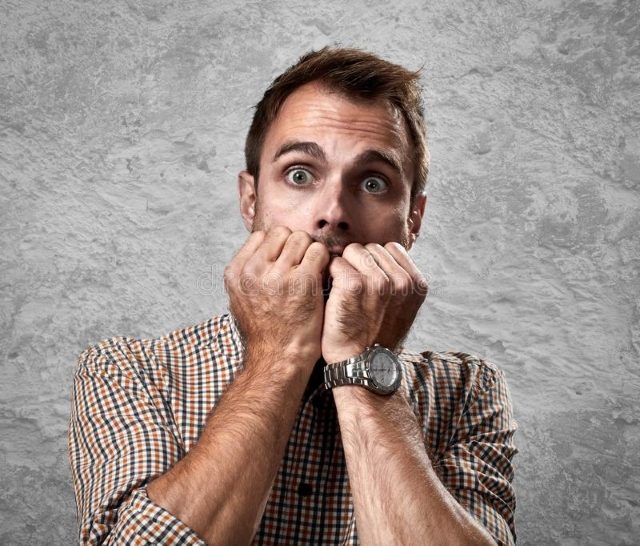

age  cosine_similarity
3  Between 20 years and 40 years old           0.245724
2  Between 15 years and 20 years old           0.240748
0             Less than 10 years old           0.231425
1  Between 10 years and 15 years old           0.226927
4  Between 40 years and 60 years old           0.224670
6             More than 80 years old           0.209360
5  Between 60 years and 80 years old           0.203917

In [23]:
df, preds = get_age(image_file)
display(Image(filename=image_file, width=360), df)

Smiling = No smiling for image3.jpg


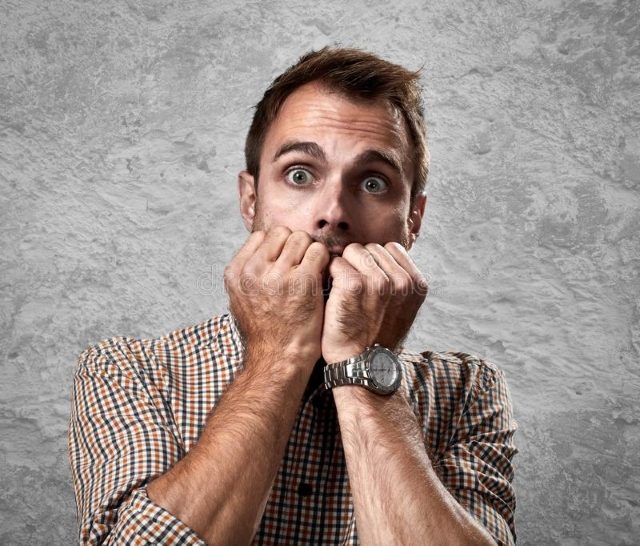

smile  cosine_similarity
1  No smiling           0.280138
0     smiling           0.237239

In [24]:
df, preds = get_smile(image_file)
display(Image(filename=image_file, width=360), df)

### Test 4

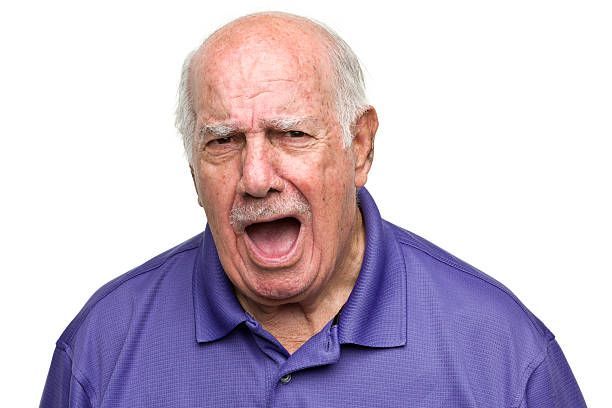

In [25]:
image_file = "image4.jpg"

Image(filename=image_file, width=360)

Sentiment = anger for image4.jpg


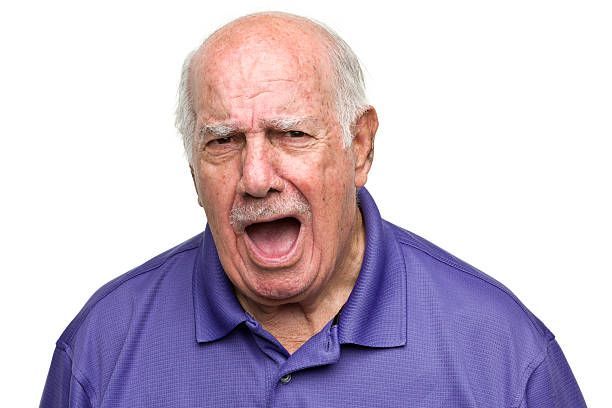

sentiment  cosine_similarity
0      anger           0.306420
1   contempt           0.258659
3       fear           0.258274
7   surprise           0.252984
6    sadness           0.234681
2    disgust           0.228821
4  happiness           0.219750
5    neutral           0.184082

In [26]:
df, preds = get_sentiment(image_file)
display(Image(filename=image_file, width=360), df)

Gender = male for image4.jpg


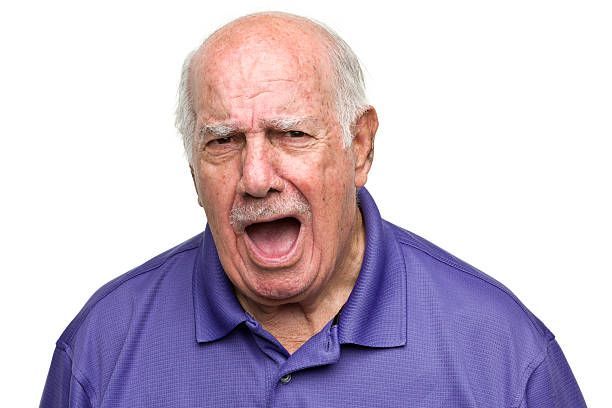

gender  cosine_similarity
0    male           0.240527
1  female           0.155031

In [27]:
df, preds = get_gender(image_file)
display(Image(filename=image_file, width=360), df)

Age = More than 80 years old for image4.jpg


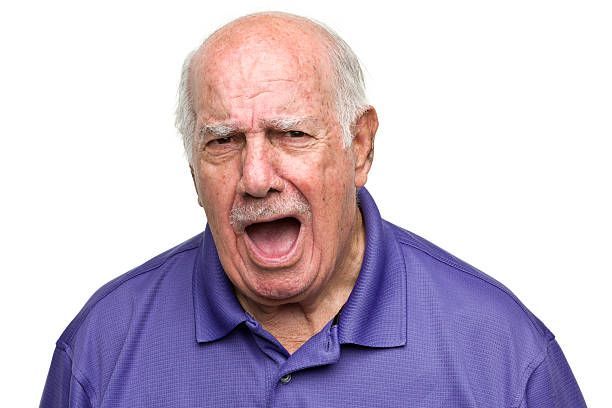

age  cosine_similarity
6             More than 80 years old           0.290968
5  Between 60 years and 80 years old           0.285460
4  Between 40 years and 60 years old           0.266708
3  Between 20 years and 40 years old           0.236228
0             Less than 10 years old           0.221663
2  Between 15 years and 20 years old           0.217570
1  Between 10 years and 15 years old           0.209900

In [28]:
df, preds = get_age(image_file)
display(Image(filename=image_file, width=360), df)

Smiling = No smiling for image4.jpg


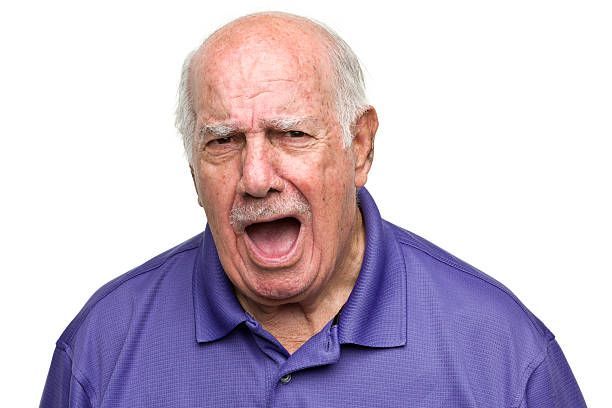

smile  cosine_similarity
1  No smiling           0.292421
0     smiling           0.244647

In [29]:
df, preds = get_smile(image_file)
display(Image(filename=image_file, width=360), df)

### Test 5

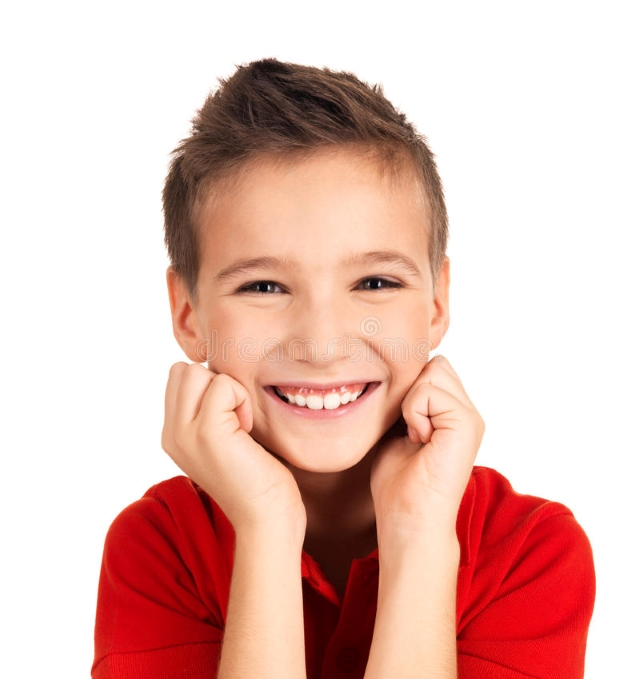

In [30]:
image_file = "image5.jpg"

Image(filename=image_file, width=360)

Sentiment = happiness for image5.jpg


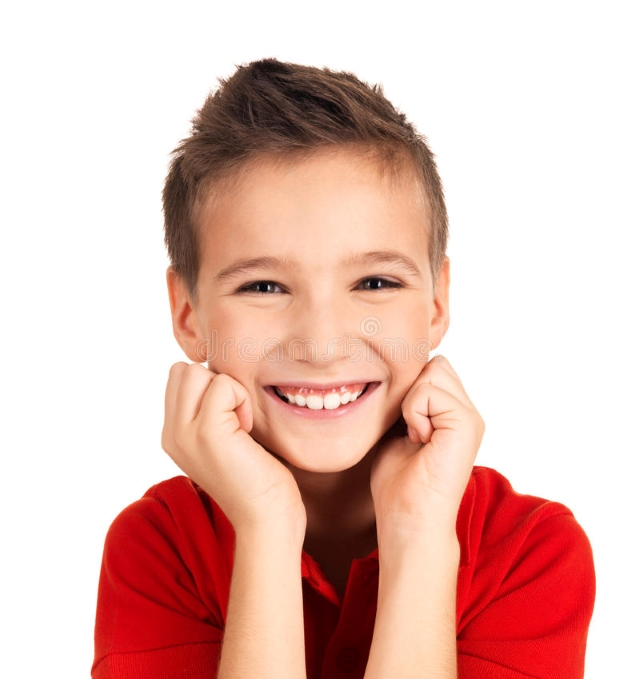

sentiment  cosine_similarity
4  happiness           0.248495
7   surprise           0.239454
0      anger           0.219868
3       fear           0.212624
6    sadness           0.191273
5    neutral           0.179673
1   contempt           0.161855
2    disgust           0.135197

In [31]:
df, preds = get_sentiment(image_file)
display(Image(filename=image_file, width=360), df)

Gender = male for image5.jpg


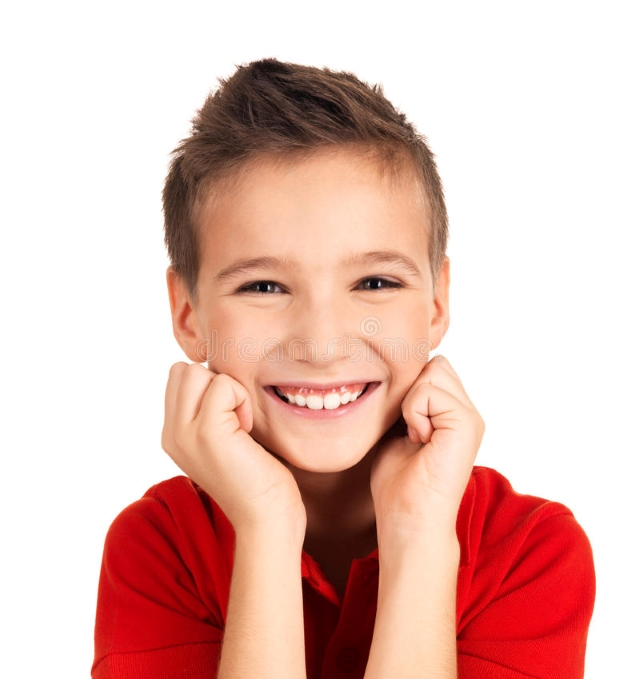

gender  cosine_similarity
0    male           0.257170
1  female           0.179194

In [32]:
df, preds = get_gender(image_file)
display(Image(filename=image_file, width=360), df)

Age = Less than 10 years old for image5.jpg


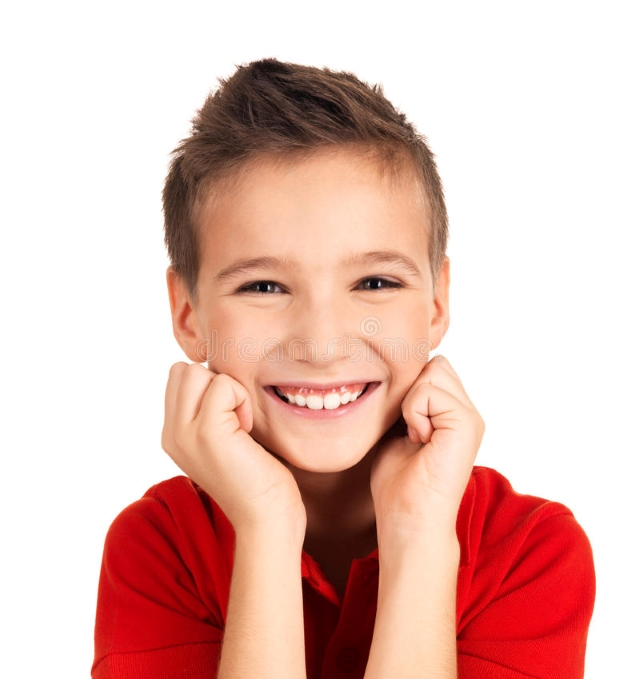

age  cosine_similarity
0             Less than 10 years old           0.286147
1  Between 10 years and 15 years old           0.279852
2  Between 15 years and 20 years old           0.241007
3  Between 20 years and 40 years old           0.205164
4  Between 40 years and 60 years old           0.198800
6             More than 80 years old           0.192037
5  Between 60 years and 80 years old           0.189404

In [33]:
df, preds = get_age(image_file)
display(Image(filename=image_file, width=360), df)

Smiling = smiling for image5.jpg


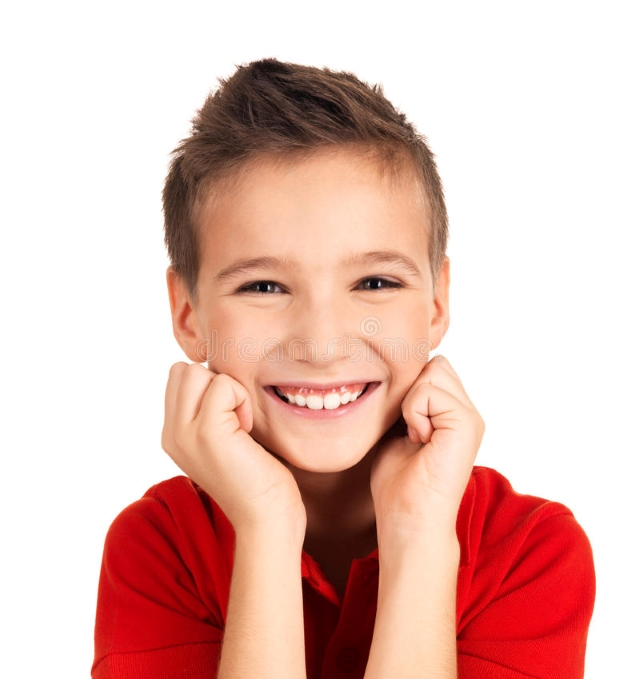

smile  cosine_similarity
0     smiling           0.301763
1  No smiling           0.257710

In [34]:
df, preds = get_smile(image_file)
display(Image(filename=image_file, width=360), df)